#Step 1: Import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

# Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data (Part 2)

In [2]:
#Imported path
path = r'/Users/racheldurand/Desktop/Data Analytics/Achievement 4/Instacart Basket Analysis RD'

In [3]:
path

'/Users/racheldurand/Desktop/Data Analytics/Achievement 4/Instacart Basket Analysis RD'

In [4]:
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

#Step 2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [5]:
#Check head
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


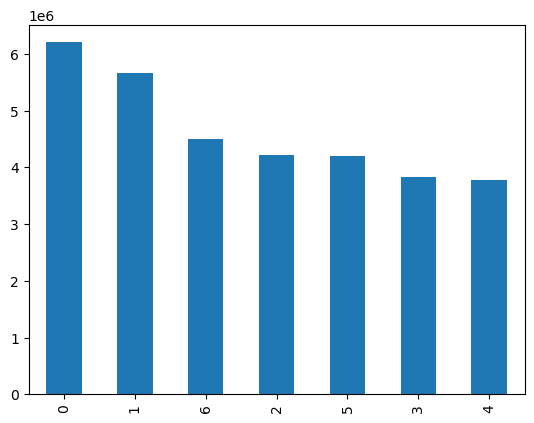

In [6]:
#Created a bar chart
bar = df_combined['orders_day_of_week'].value_counts().plot.bar()

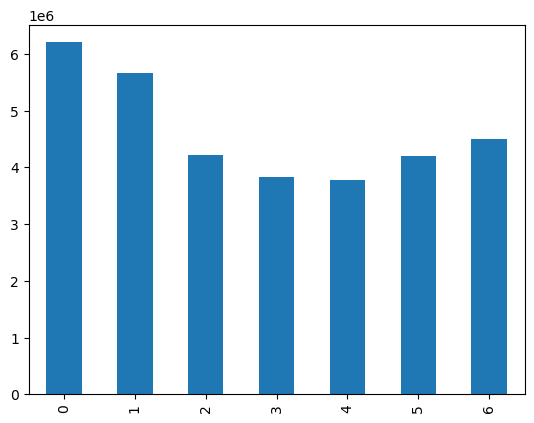

In [14]:
#Sort bar chart
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [18]:
#Exported bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_combined.png'))

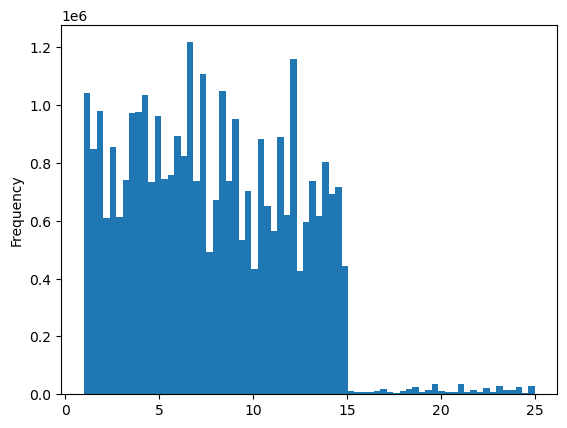

In [16]:
#Created a histogram
hist = df_combined['prices'].plot.hist(bins = 70)

In [17]:
#Exported histogram chart as an image
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_combined_70.png'))

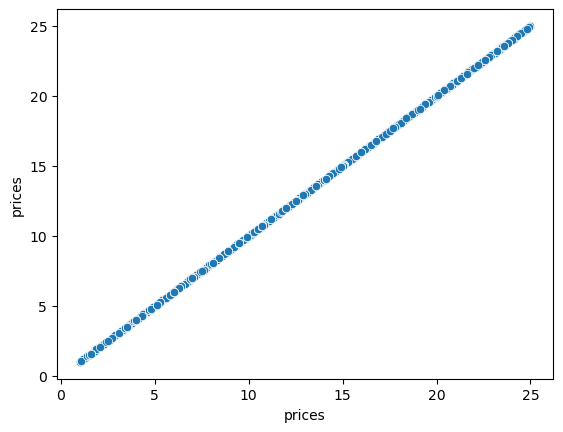

In [19]:
#Created a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [21]:
#Exported scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatplt_prices_combined.png'))

In [22]:
#Created a list holding true/false values to test the np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [23]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [24]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [25]:
#Store 70% of the sample in the dataframe big
big = df_combined[dev]

In [26]:
#Store 30% of the sameple in the datafreame small
small = df_combined[~dev]

In [27]:
#Check length of dataframe (# of rows)
len(df_combined)

32404859

In [28]:
len(big) + len(small)

32404859

In [29]:
# Creates new dataframe where prices and order_day_of_week columns are from the small subset
df_small = small[['orders_day_of_week','prices']]

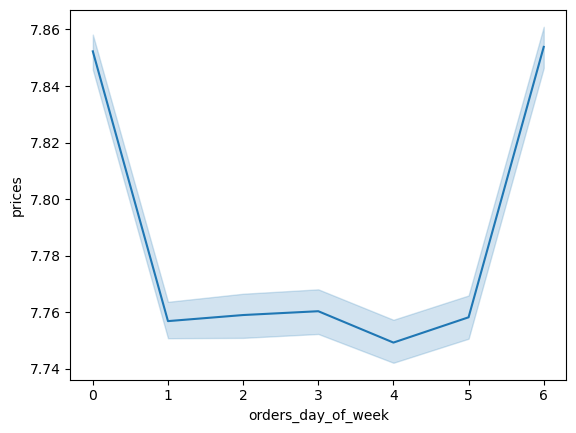

In [30]:
#Created lineplot
lineplot = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [31]:
#Exported the lineplot
lineplot.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_combined.png' ))

#Step 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

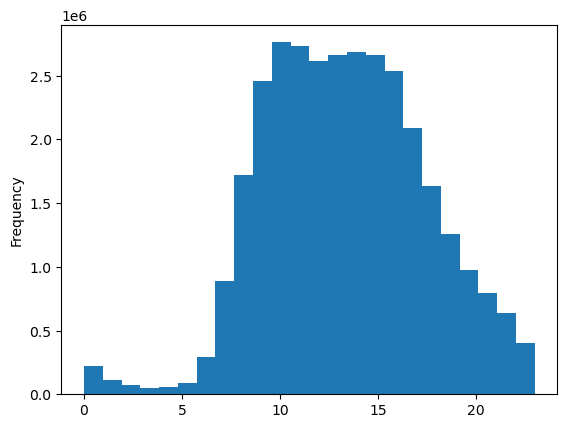

In [32]:
#Created a histogram for 'order_hour_of_day'
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

The frequency of the orders peak from 10-17, which is 10am to 5pm.

In [33]:
#Exported histogram chart as an image
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hour_combined_24.png'))

#Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [42]:
#Created a loyalty flag
df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)

In [43]:
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [44]:
df_combined.loc[df_combined['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [45]:
df_combined.loc[(df_combined['max_order'] <= 40) & (df_combined['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [46]:
df_combined.loc[df_combined['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [47]:
df_combined['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

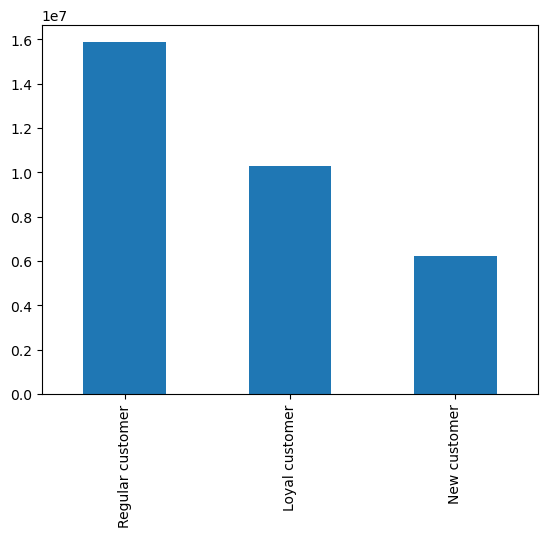

In [49]:
#Created bar chart for loyalty flagb
cust_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

In [50]:
#Exported bar chart
cust_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'cust_loyalty_flag_combined.png' ))

#Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [51]:
#Created small dataframe for the columns we need and using the small database we already have
df_small2 = small[['prices', 'order_hour_of_day'] ]

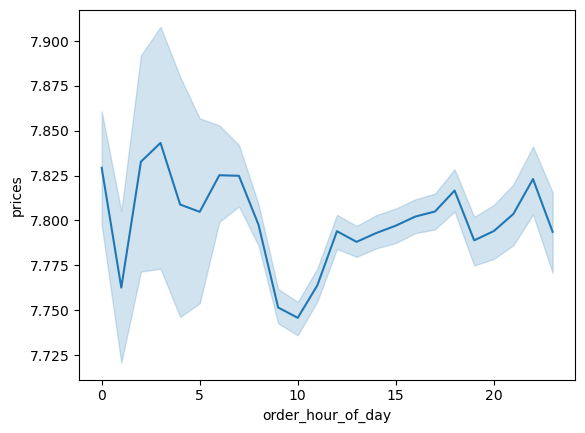

In [52]:
#Created lineplot for above df
line_hour = sns.lineplot(data = df_small2, x = 'order_hour_of_day',y = 'prices')

In [53]:
#Exported the lineplot
line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'expenditures_hour_combined.png' ))

#Step 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [54]:
#Created small dataframe for the columns we need and using the small database we already have
#Checking to see if there is a connection between age & number of dependents
df_small3 = small[['age', 'Number_of_Dependants']]

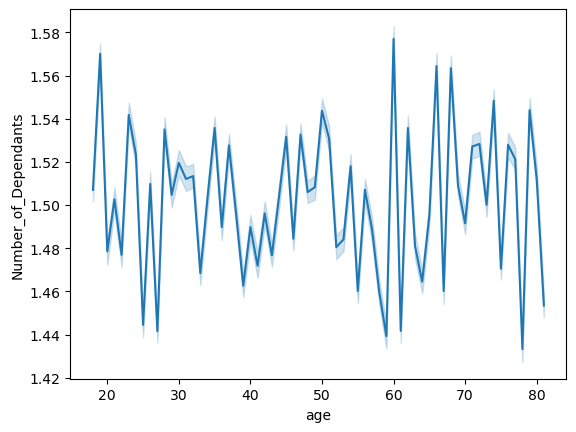

In [55]:
#Created lineplot for above df
line_age = sns.lineplot (data = df_small3, x = 'age', y = 'Number_of_Dependants')

The line plot does not show a clear trend between age and number of dependents, as the line plot conists of a lot of variation based on the different ages. It can be seen how those 18 yrs old and under have no dependents, which makes sense since they are considered minors.

In [57]:
#Exported lineplot
line_age.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_connection_combined.png'))

#Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

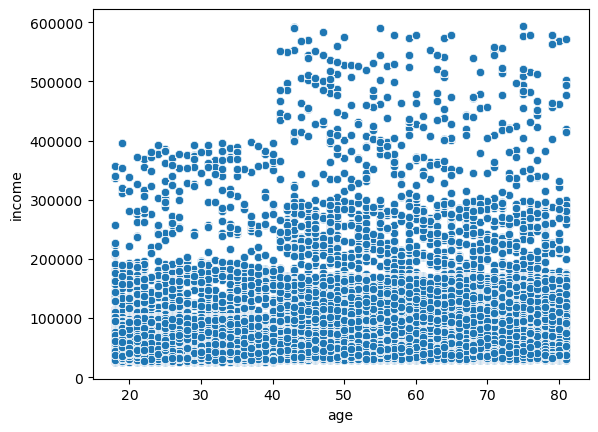

In [59]:
#Created a scatter plot for age & income
scatterplot_income = sns.scatterplot(data = df_combined, x= 'age', y = 'income')

The scatterplot above shows the income in relation to customer's ages in 10 year increments. It can be seen that a majority of the customer's make below $200k while starting from the 40 yr old customer's their income increase from $200l up to $600k. It also is known as someone's age increases their income increases along with their assets they have.

In [60]:
#Exported scatterplot
scatterplot_income.figure.savefig(bos.path.join (path,'04 Analysis', 'Visualizations', 'income_scatterplot_combined.png'))

#Step 8 and 9: Export your visualizations as “.png” files in your relevant project folder. Save your notebook from part 2 of this Exercise’s task.

All visualizations were exported in part 2 and went into the visualizations folder.

In [ ]:
#Exported the customer_merged file
df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged_updated.pkl'))